# Experiment 20

Experiment to test the ability of GASP to separate linearly separable signals. Conclusion: Linear GASP in separable. (Update: 8/8/2024)

In [4]:
import sys
sys.path.insert(0, '../../')  

(1, 256, 1, 16, 3)


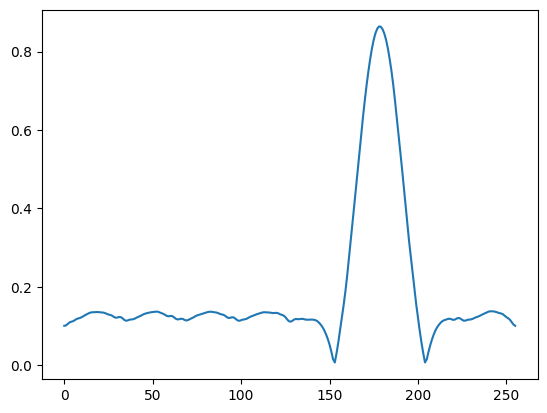

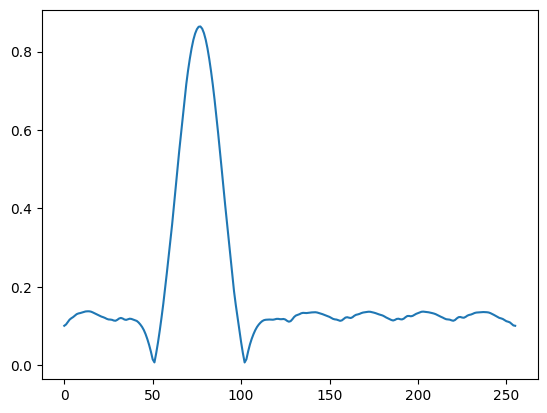

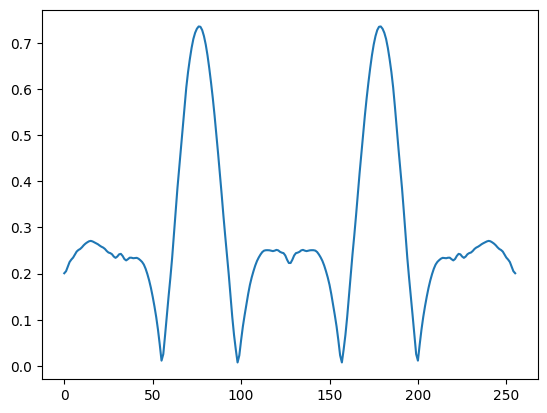

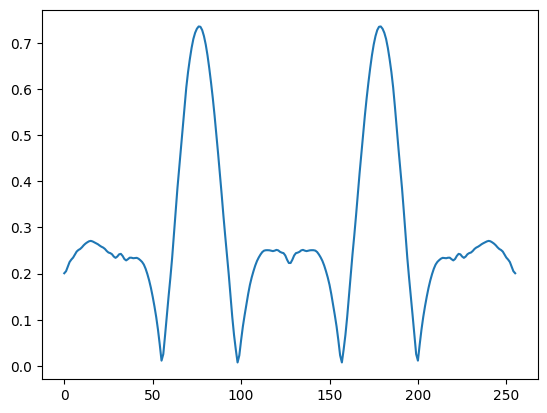

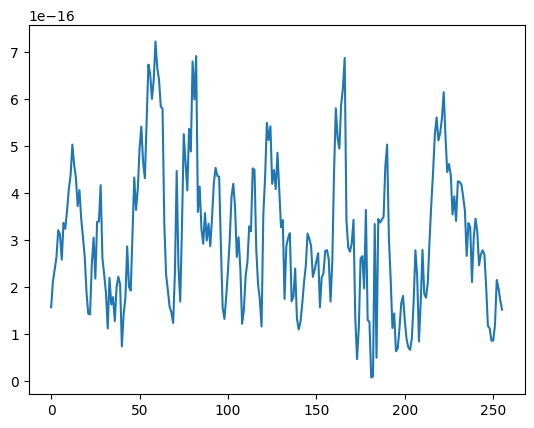

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, responses

# Simulate ssfp with tissue phantom 
M = simulate_ssfp(width = 256, height = 1, npcs = 16, TRs = [5e-3, 10e-3, 20e-3], alpha = np.deg2rad(30), gradient = 2 * np.pi, phantom_type='line', phantom_padding=0)
D1 = responses.gaussian(width=256, bw=0.2, shift=0.2)
D2 = responses.gaussian(width=256, bw=0.2, shift=-0.2)
D3 = D1 + D2

print(M.shape)

# Train gasp model coefficients
method = 'linear'
data = process_data_for_gasp(M)
Ic1, An1 = train_gasp(data[0], D1, method=method)
Ic2, An2 = train_gasp(data[0], D2, method=method)
Ic3, An3 = train_gasp(data[0], D3, method=method)

An4 = An1 + An2
Ic4 = run_gasp(M, An4, method=method)

# Plot results
plt.plot(np.abs(Ic1).T)
plt.show()
plt.plot(np.abs(Ic2).T)
plt.show()
plt.plot(np.abs(Ic3).T)
plt.show()
plt.plot(np.abs(Ic4).T)
plt.show()
plt.plot(np.abs(Ic4 - Ic3).T)
plt.show()

In [6]:
An1 + An2

array([ 4.78196980e-05+5.94135852e-13j,  6.38227013e-04+6.21863672e-14j,
       -4.15367630e-04-6.15618667e-14j, -1.37487609e-02-6.98849410e-02j,
        1.25661776e-02+6.07469386e-02j,  1.37625206e-02+7.32363470e-02j,
        2.72306328e-02+6.61890879e-02j, -3.62578421e-02-9.08487607e-02j,
       -2.45780896e-02-6.12021200e-02j, -5.25062719e-02-7.95079852e-02j,
        7.15133911e-03+1.03785697e-02j,  3.92018343e-02+6.13444889e-02j,
       -8.44397180e-02-8.43645164e-02j, -8.15288247e-02-8.33100811e-02j,
       -1.61289515e-02-1.72700872e-02j, -2.60716451e-01-1.73825785e-01j,
       -5.99941123e-02-4.03158451e-02j,  4.15315194e-02+2.89831612e-02j,
       -6.71732251e-02-2.59044648e-02j, -1.31139980e-01-5.50693503e-02j,
        2.33714963e-03+5.24621346e-04j,  3.46675030e-01+7.04871435e-02j,
       -1.11901930e-01-2.23336980e-02j,  4.15709939e-02+8.62108800e-03j,
        6.29781318e-01-3.94085806e-14j, -1.50123399e-01+9.33336795e-15j,
        1.01328786e-02+1.89474087e-14j,  3.46675030